<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.152322,33.816263,-0.001988,140.966597,140.970894,-0.004297
1,0.0,1.0,85.356598,82.032942,0.005413,177.394953,177.389949,0.005004
2,0.0,2.0,70.203421,58.550359,0.005274,138.759054,138.754816,0.004238
3,0.0,3.0,63.303322,30.376893,0.012206,103.692421,103.682165,0.010256
4,0.0,4.0,70.510383,76.578640,-0.005036,157.083986,157.089416,-0.005429
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.696413,57.255132,-0.005810,113.945735,113.952251,-0.006516
249996,999.0,246.0,49.465169,74.705299,0.001864,134.172332,134.171029,0.001303
249997,999.0,247.0,62.305271,60.470659,0.011062,132.786992,132.776124,0.010868
249998,999.0,248.0,52.053273,79.403684,0.003286,141.460242,141.457418,0.002823


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    97.152322  33.816263 -0.001988  140.966597  140.970894 -0.004297
      1.0    85.356598  82.032942  0.005413  177.394953  177.389949  0.005004
      2.0    70.203421  58.550359  0.005274  138.759054  138.754816  0.004238
      3.0    63.303322  30.376893  0.012206  103.692421  103.682165  0.010256
      4.0    70.510383  76.578640 -0.005036  157.083986  157.089416 -0.005429
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.696413  57.255132 -0.005810  113.945735  113.952251 -0.006516
      246.0  49.465169  74.705299  0.001864  134.172332  134.171029  0.001303
      247.0  62.305271  60.470659  0.011062  132.786992  132.776124  0.010868
      248.0  52.053273  79.403684  0.003286  141.460242  141.457418  0.002823
      249.0  65.547353  75.205132 -0.002719  150.749766  150.752527 -0.002761

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    97.152322  33.816263 -0.001988  140.966597  140.970894 -0.004297
      1.0    85.356598  82.032942  0.005413  177.394953  177.389949  0.005004
      2.0    70.203421  58.550359  0.005274  138.759054  138.754816  0.004238
      3.0    63.303322  30.376893  0.012206  103.692421  103.682165  0.010256
      4.0    70.510383  76.578640 -0.005036  157.083986  157.089416 -0.005429
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.696413  57.255132 -0.005810  113.945735  113.952251 -0.006516
      246.0  49.465169  74.705299  0.001864  134.172332  134.171029  0.001303
      247.0  62.305271  60.470659  0.011062  132.786992  132.776124  0.010868
      248.0  52.053273  79.403684  0.003286  141.460242  141.457418  0.002823
      249.0  65.547353  75.205132 -0.002719  150.749766  150.752527 -0.002761

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.152322,33.816263,-0.001988,140.966597,140.970894,-0.004297
1,0.0,1.0,85.356598,82.032942,0.005413,177.394953,177.389949,0.005004
2,0.0,2.0,70.203421,58.550359,0.005274,138.759054,138.754816,0.004238
3,0.0,3.0,63.303322,30.376893,0.012206,103.692421,103.682165,0.010256
4,0.0,4.0,70.510383,76.578640,-0.005036,157.083986,157.089416,-0.005429
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.696413,57.255132,-0.005810,113.945735,113.952251,-0.006516
249996,999.0,246.0,49.465169,74.705299,0.001864,134.172332,134.171029,0.001303
249997,999.0,247.0,62.305271,60.470659,0.011062,132.786992,132.776124,0.010868
249998,999.0,248.0,52.053273,79.403684,0.003286,141.460242,141.457418,0.002823


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    97.152322  33.816263 -0.001988  140.966597  140.970894 -0.004297
      1.0    85.356598  82.032942  0.005413  177.394953  177.389949  0.005004
      2.0    70.203421  58.550359  0.005274  138.759054  138.754816  0.004238
      3.0    63.303322  30.376893  0.012206  103.692421  103.682165  0.010256
      4.0    70.510383  76.578640 -0.005036  157.083986  157.089416 -0.005429
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.696413  57.255132 -0.005810  113.945735  113.952251 -0.006516
      246.0  49.465169  74.705299  0.001864  134.172332  134.171029  0.001303
      247.0  62.305271  60.470659  0.011062  132.786992  132.776124  0.010868
      248.0  52.053273  79.403684  0.003286  141.460242  141.457418  0.002823
      249.0  65.547353  75.205132 -0.002719  150.749766  150.752527 -0.002761

[250000 rows x 6 columns]

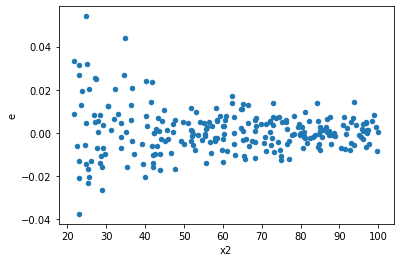

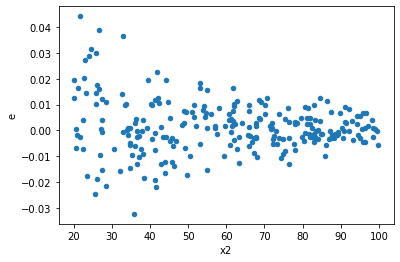

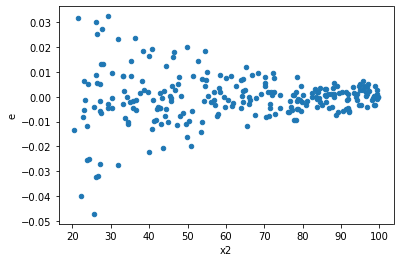

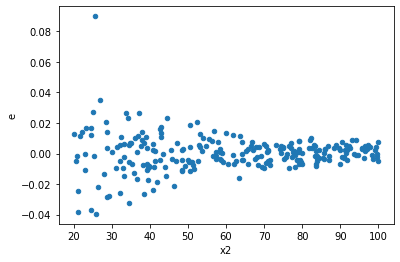

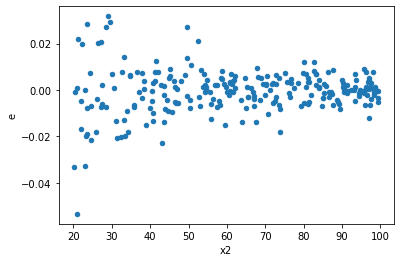

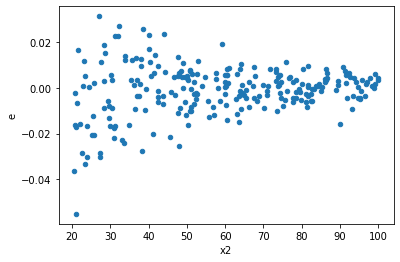

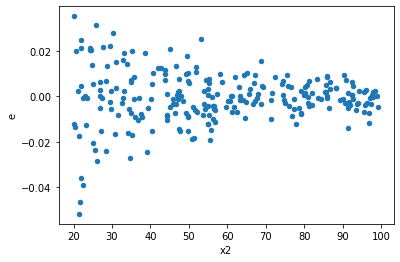

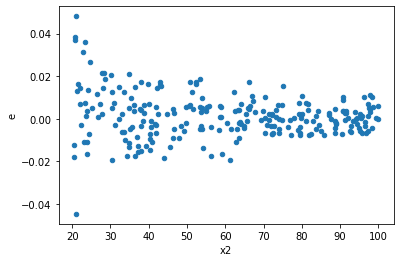

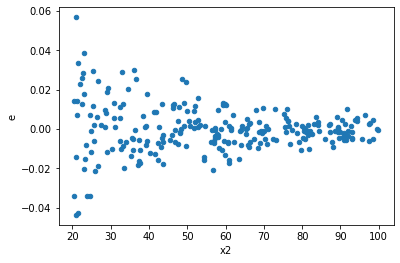

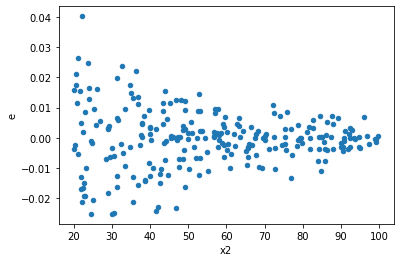

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,117.0,129.0,0.006656195037154664,0.022224063387511327,5.689055587311679e-05,0.00017227956114349867,3.028262925181016,1.6199843688724513e-09,0.9999999991900078,8.099921844362257e-10,Reject001=0 : Heteroscedasticity
4.0,117.0,129.0,0.0041470070966616104,0.018143322210786732,3.544450509967188e-05,0.00014064590861074985,3.9680595966919525,1.1324274851176597e-13,0.9999999999999434,5.6621374255882984e-14,Reject001=0 : Heteroscedasticity
5.0,121.0,125.0,0.006899631446984241,0.021875723588786554,5.702174749573753e-05,0.00017500578871029244,3.0691060235110195,1.267207450084129e-09,0.9999999993663963,6.336037250420645e-10,Reject001=0 : Heteroscedasticity
10.0,117.0,129.0,0.005852450712999526,0.02556181106401652,5.0020946264953214e-05,0.00019815357413966296,3.9614119471086,1.2079226507921703e-13,0.9999999999999396,6.039613253960852e-14,Reject001=0 : Heteroscedasticity
13.0,130.0,116.0,0.00678129139616384,0.025737463783315404,5.2163779970491075e-05,0.00022187468778720175,4.253424270877527,3.197442310920451e-14,0.999999999999984,1.5987211554602254e-14,Reject001=0 : Heteroscedasticity
14.0,126.0,120.0,0.008491765448618223,0.030666773847469502,6.73949638779224e-05,0.0002555564487289125,3.791922037258174,1.3453682612407647e-12,0.9999999999993273,6.726841306203823e-13,Reject001=0 : Heteroscedasticity
16.0,134.0,112.0,0.006575164764003342,0.02070582215846194,4.906839376121897e-05,0.00018487341212912448,3.767667901027535,3.959721439628083e-12,0.9999999999980201,1.9798607198140417e-12,Reject001=0 : Heteroscedasticity
17.0,102.0,144.0,0.006083334797488855,0.024037145160082034,5.964053723028289e-05,0.00016692461916723635,2.798844995689932,1.4708046114364492e-08,0.9999999926459769,7.354023057182246e-09,Reject001=0 : Heteroscedasticity
19.0,125.0,121.0,0.006205163704818295,0.0240820954226217,4.9641309638546365e-05,0.000199025582005138,4.009273394564012,1.5942802633617248e-13,0.9999999999999203,7.971401316808624e-14,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,117.0,129.0,0.006656195037154664,0.022224063387511327,5.689055587311679e-05,0.00017227956114349867,3.028262925181016,1.6199843688724513e-09,Reject001=0 : Heteroscedasticity
1.0,120.0,126.0,0.01816259577356781,0.006597961970359484,0.00015135496477973175,5.236477754253559e-05,0.3459733059879636,1.077918287764505e-08,Reject001=0 : Heteroscedasticity
2.0,121.0,125.0,0.020820519562003474,0.003903433203377736,0.0001720704096033345,3.122746562702189e-05,0.18148074209278073,4.963759799762005e-19,Reject001=0 : Heteroscedasticity
3.0,146.0,100.0,0.03165484785189307,0.0034497255090234166,0.00021681402638282926,3.4497255090234165e-05,0.15910988631944986,3.8675674157112115e-23,Reject001=0 : Heteroscedasticity
4.0,117.0,129.0,0.0041470070966616104,0.018143322210786732,3.544450509967188e-05,0.00014064590861074985,3.9680595966919525,1.1324274851176597e-13,Reject001=0 : Heteroscedasticity
5.0,121.0,125.0,0.006899631446984241,0.021875723588786554,5.702174749573753e-05,0.00017500578871029244,3.0691060235110195,1.267207450084129e-09,Reject001=0 : Heteroscedasticity
6.0,127.0,119.0,0.0258802379723677,0.006996208081299335,0.00020378140135722598,5.8791664548733906e-05,0.28850358353200706,1.872812422976818e-11,Reject001=0 : Heteroscedasticity
7.0,130.0,116.0,0.020715195967109527,0.006143051572099395,0.0001593476612854579,5.295734113878789e-05,0.3323383645017499,1.9136058506568404e-09,Reject001=0 : Heteroscedasticity
8.0,150.0,96.0,0.03109356415372686,0.004570111801448124,0.00020729042769151242,4.760533126508463e-05,0.22965523201066676,9.266908804201108e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    997
Reject001=1 : Homoscedasticity        3
Name: Result_test, dtype: int64